### Making graphs

In [4]:
# Install packages
#pip install pandas openpyxl matplotlib cartopy 
#pip install scipy

In [15]:
# Loading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature
import matplotlib.colors as mcolors
import matplotlib.cm as cm

In [3]:
# Loading data
data = pd.read_excel("Data/Data_final.xlsx") 

# Display the first 5 rows
print(data.head())

metadata = pd.read_excel("Data/Metadata_final.xlsx") 

# Display the first 5 rows  
print(metadata.head())

         Sample_Name  SeaDistance_m Location Duplicate    Datetime   Latitude  \
0  SLWT_2024_01_19_A            NaN    shore         A  2024_01_19  16.625000   
1  SLWT_2024_01_19_B            NaN    shore         B  2024_01_19  16.625000   
2  SLWT_2024_01_20_A            NaN    shore         A  2024_01_20  16.401667   
3  SLWT_2024_01_20_B            NaN    shore         B  2024_01_20  16.401667   
4  SLWT_2024_01_21_A            NaN    shore         A  2024_01_21  16.316667   

   Longitude  Type  HP_12CH4_dry_mean  HR_12CH4_dry_mean  ...  AirT_degC  \
0 -25.325000   NaN           1.854859           1.838359  ...       24.5   
1 -25.325000   NaN           1.729128           1.715480  ...       24.5   
2 -27.518333   NaN           1.827733           1.818951  ...       23.5   
3 -27.518333   NaN           1.892697           1.893364  ...       23.5   
4 -30.581667   NaN           1.902200           1.882740  ...       25.0   

   AirP_hPa  CH4atm_ppm  CO2atm_ppm  d13C_CH4atm_permil 

### Map of the sampling sites

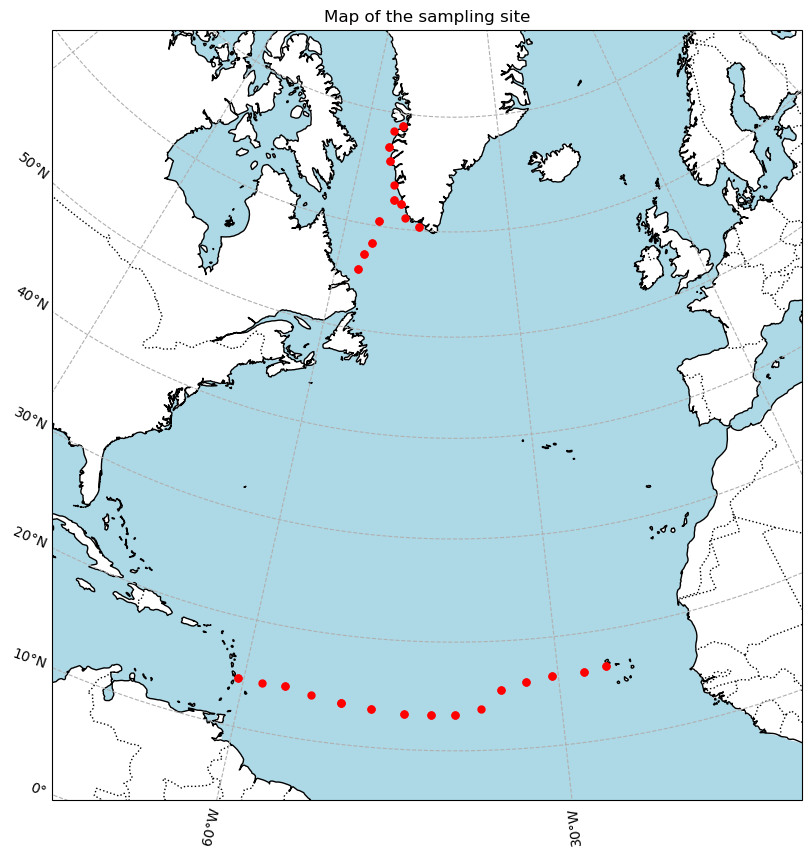

In [4]:
gps_points = list(zip(data["Longitude"], data["Latitude"]))

# Create the figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.LambertConformal(central_longitude=-40, central_latitude=50)}, figsize=(10, 10))

# Set map extent (focus on North Atlantic)
ax.set_extent([-75, -10, 5, 75], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor="white")
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.BORDERS, linestyle=":")

# Add grid lines
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Plot the GPS points
for lon, lat in gps_points:
    ax.plot(lon, lat, marker='o', markersize=5, color='red', transform=ccrs.PlateCarree())

# Add title
plt.title("Map of the sampling site")

# Show the plot
plt.show()

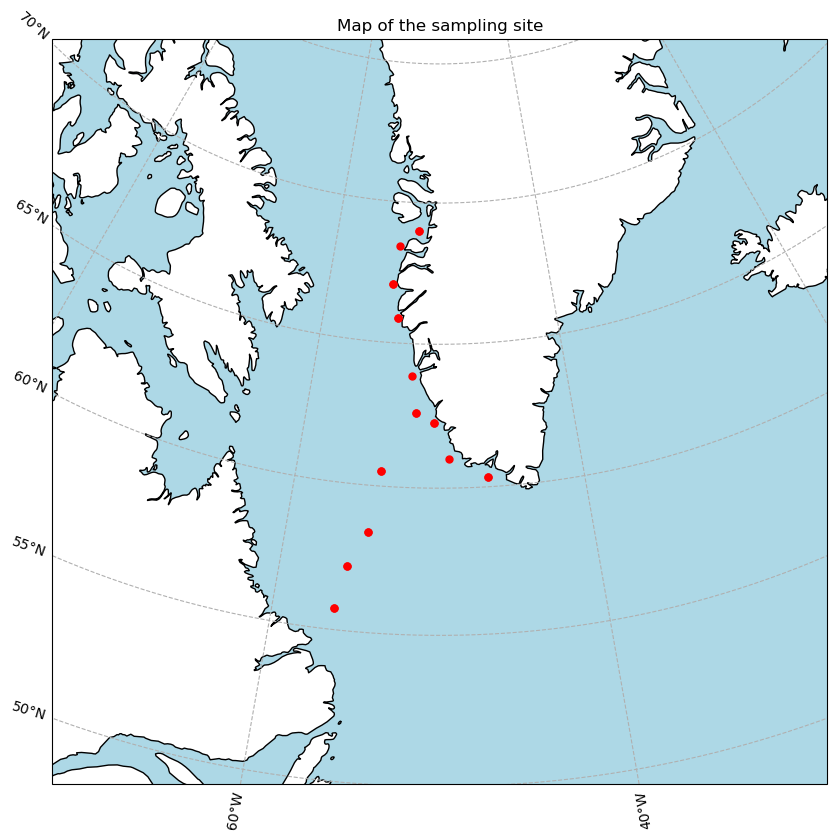

In [5]:
# Focus on the Artic for better precision
# Create the figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.NorthPolarStereo(central_longitude=-50, true_scale_latitude=None)}, figsize=(10, 10))

# Set map extent (focus on North Atlantic)
ax.set_extent([-70, -30, 50, 75], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor="white")
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.BORDERS, linestyle=":")

# Add grid lines
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Plot the GPS points
for lon, lat in gps_points:
    ax.plot(lon, lat, marker='o', markersize=5, color='red', transform=ccrs.PlateCarree())

# Add title
plt.title("Map of the sampling site")

# Show the plot
plt.show()

## Plot of atm concentration

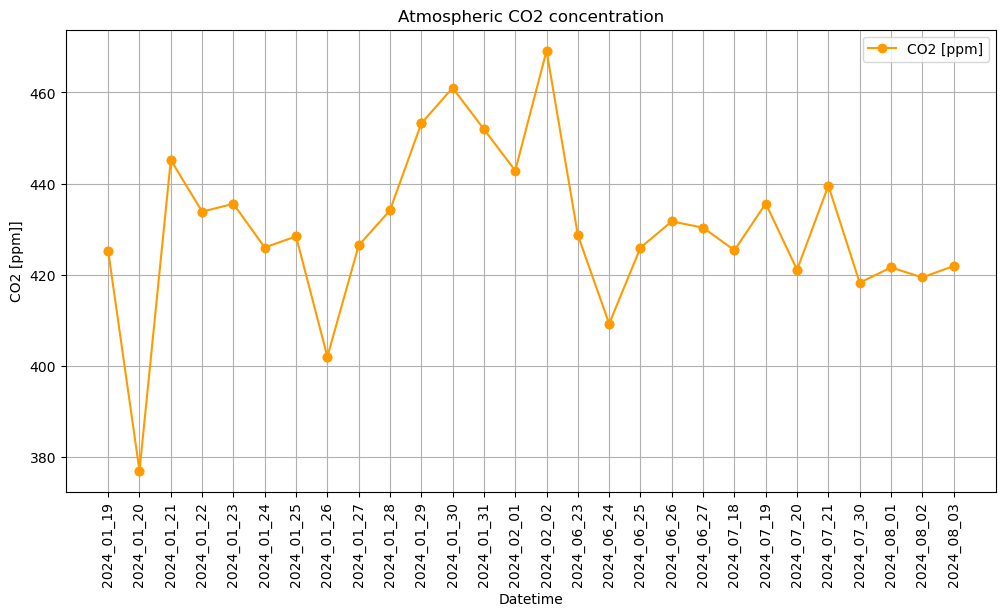

In [12]:
# Overall CO2 atm [ppm]

plt.figure(figsize=(12, 6))
plt.plot(data['Datetime'], data['CO2atm_ppm'], marker='o', color = '#ff9b00', label='CO2 [ppm]', zorder = 2)

plt.title('Atmospheric CO2 concentration')
plt.xlabel('Datetime')
plt.ylabel('CO2 [ppm]]')
plt.xticks(rotation=90)
plt.grid(True, zorder=0)
plt.legend()
plt.show()

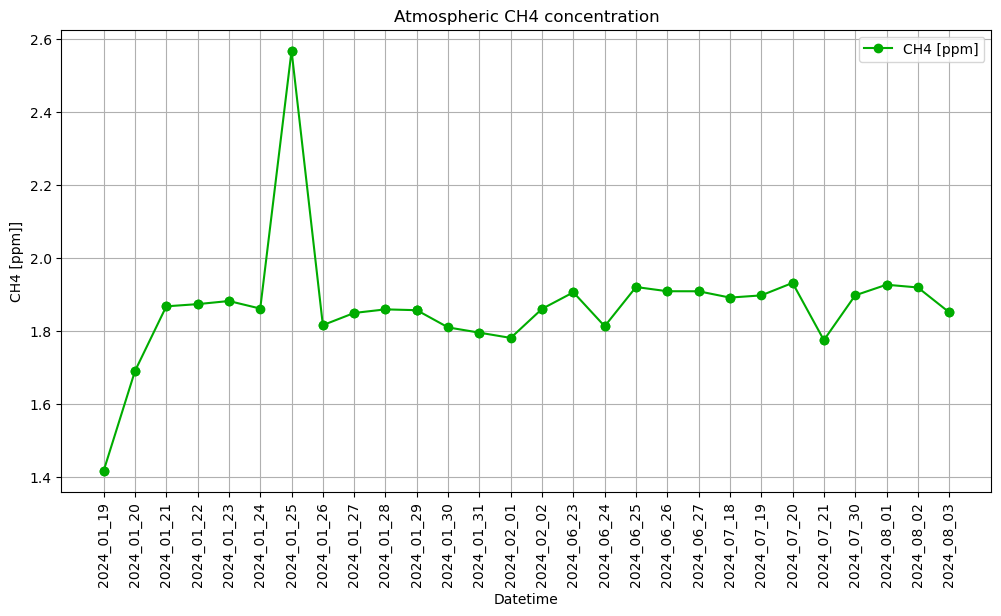

In [13]:
# Overall CH4 atm [ppm]

plt.figure(figsize=(12, 6))
plt.plot(data['Datetime'], data['CH4atm_ppm'], marker='o', color = '#00ac00', label='CH4 [ppm]', zorder = 2)

plt.title('Atmospheric CH4 concentration')
plt.xlabel('Datetime')
plt.ylabel('CH4 [ppm]')
plt.xticks(rotation=90)
plt.grid(True, zorder=0)
plt.legend()
plt.show()

## Map of atmospehric concentration

C:\Users\lolap\AppData\Local\Temp\ipykernel_10232\3198051081.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('OrRd')


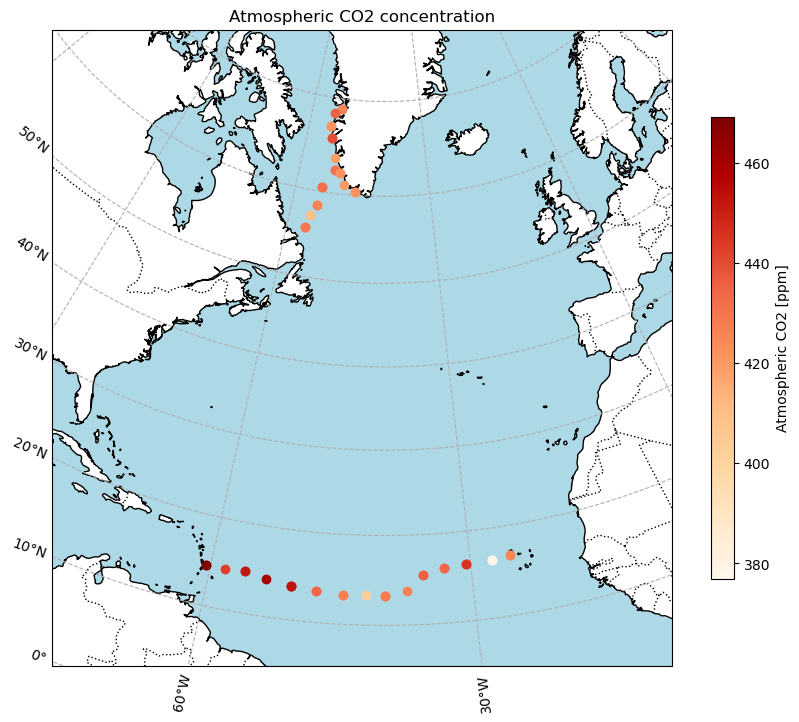

In [37]:
# Atmospheric CO2 

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.LambertConformal(central_longitude=-40, central_latitude=50)}, figsize=(10, 10))

# Set map extent (focus on North Atlantic)
ax.set_extent([-75, -10, 5, 75], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor="white")
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.BORDERS, linestyle=":")

# Add grid lines
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Normalize the concentration values for color scaling
norm = mcolors.Normalize(vmin=data['CO2atm_ppm'].min(), vmax=data['CO2atm_ppm'].max())
colormap = cm.get_cmap('OrRd')

# Plot the GPS points with color depending on concentration
for _, row in data.iterrows():
    rgba = colormap(norm(row['CO2atm_ppm']))  # Get the color based on concentration
    hex_color = mcolors.to_hex(rgba)  # Convert to hex color
    ax.plot(row['Longitude'], row['Latitude'], marker='o', markersize=6, color=hex_color, transform=ccrs.PlateCarree())

# Add colorbar legend
sm = cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])  # Needed only for matplotlib < 3.1
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.6, pad=0.05)
cbar.set_label('Atmospheric CO2 [ppm]')

# Add title
plt.title("Atmospheric CO2 concentration")

# Show the plot
plt.show()

C:\Users\lolap\AppData\Local\Temp\ipykernel_10232\555900855.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('RdPu')


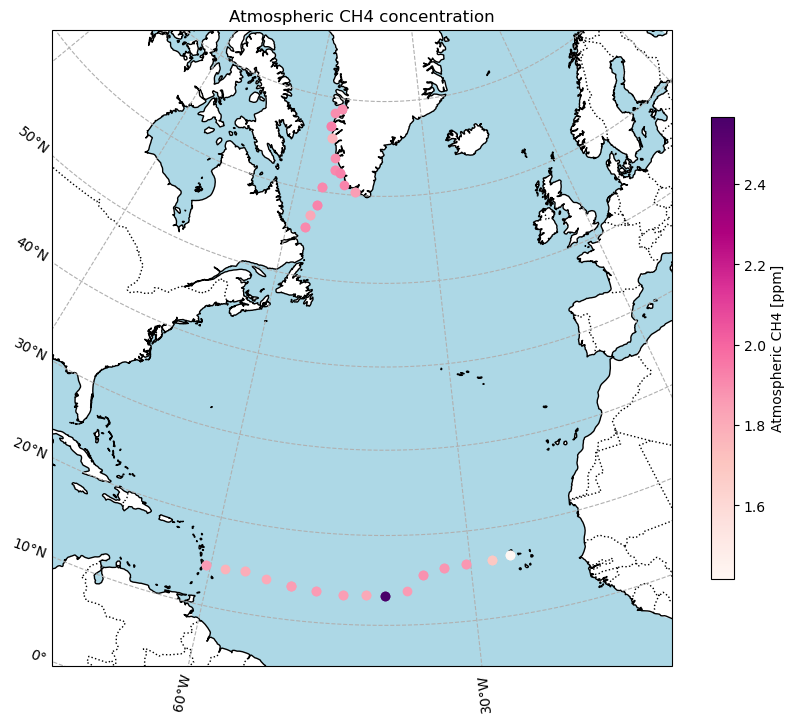

In [43]:
# Atmospheric CO2 

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.LambertConformal(central_longitude=-40, central_latitude=50)}, figsize=(10, 10))

# Set map extent (focus on North Atlantic)
ax.set_extent([-75, -10, 5, 75], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor="white")
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.BORDERS, linestyle=":")

# Add grid lines
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Normalize the concentration values for color scaling
norm = mcolors.Normalize(vmin=data['CH4atm_ppm'].min(), vmax=data['CH4atm_ppm'].max())
colormap = cm.get_cmap('RdPu')

# Plot the GPS points with color depending on concentration
for _, row in data.iterrows():
    rgba = colormap(norm(row['CH4atm_ppm']))  # Get the color based on concentration
    hex_color = mcolors.to_hex(rgba)  # Convert to hex color
    ax.plot(row['Longitude'], row['Latitude'], marker='o', markersize=6, color=hex_color, transform=ccrs.PlateCarree())

# Add colorbar legend
sm = cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])  # Needed only for matplotlib < 3.1
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.6, pad=0.05)
cbar.set_label('Atmospheric CH4 [ppm]')

# Add title
plt.title("Atmospheric CH4 concentration")

# Show the plot
plt.show()

## Plot CO2/CH4 concentration in the water

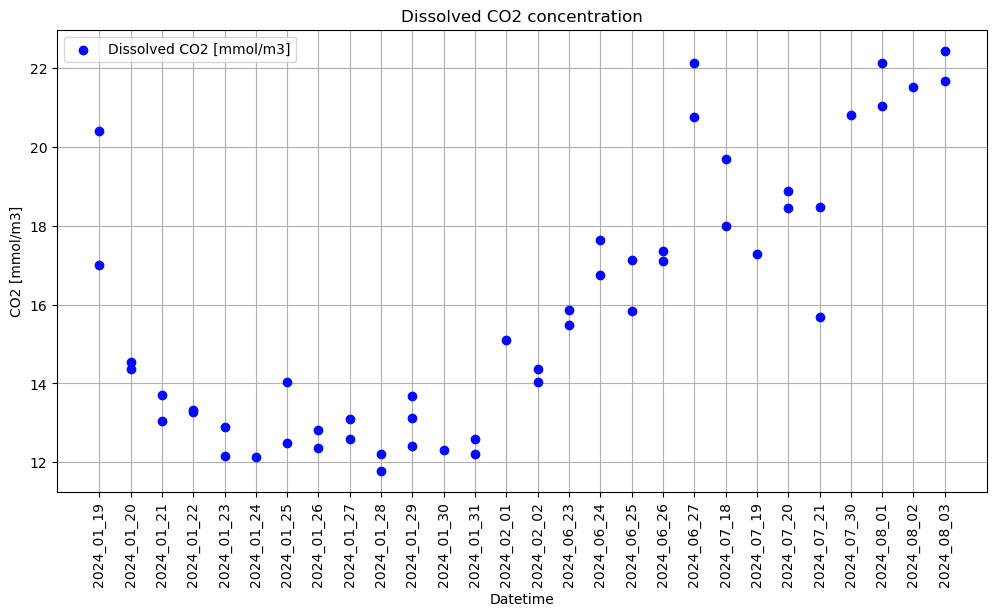

In [30]:
#Overall dissolved CO2 concentration
plt.figure(figsize=(12, 6))
plt.scatter(data['Datetime'], data['co2_mmolm3'], marker='o', color = '#0008ff', label='Dissolved CO2 [mmol/m3]', zorder = 2)

plt.title('Dissolved CO2 concentration')
plt.xlabel('Datetime')
plt.ylabel('CO2 [mmol/m3]')
plt.xticks(rotation=90)
plt.grid(True, zorder=0)
plt.legend()
plt.show()

In [26]:
#change of units: mmol/m3 --> umol/m3
data['ch4_umolm3'] = data['ch4_mmolm3'] * 10**3 
print(data.head())

         Sample_Name  SeaDistance_m Location Duplicate    Datetime   Latitude  \
0  SLWT_2024_01_19_A            NaN    shore         A  2024_01_19  16.625000   
1  SLWT_2024_01_19_B            NaN    shore         B  2024_01_19  16.625000   
2  SLWT_2024_01_20_A            NaN    shore         A  2024_01_20  16.401667   
3  SLWT_2024_01_20_B            NaN    shore         B  2024_01_20  16.401667   
4  SLWT_2024_01_21_A            NaN    shore         A  2024_01_21  16.316667   

   Longitude  Type  HP_12CH4_dry_mean  HR_12CH4_dry_mean  ...  AirP_hPa  \
0 -25.325000   NaN           1.854859           1.838359  ...    1016.0   
1 -25.325000   NaN           1.729128           1.715480  ...    1016.0   
2 -27.518333   NaN           1.827733           1.818951  ...    1014.7   
3 -27.518333   NaN           1.892697           1.893364  ...    1014.7   
4 -30.581667   NaN           1.902200           1.882740  ...    1014.9   

   CH4atm_ppm  CO2atm_ppm  d13C_CH4atm_permil  d13C_CO2atm_per

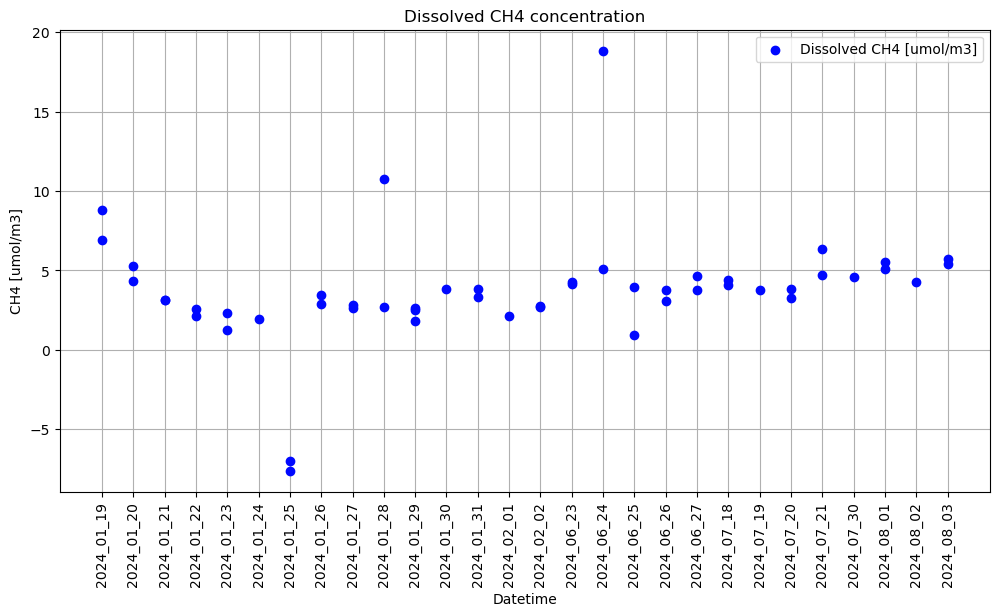

In [31]:
#Overall dissolved CH4 concentration

plt.figure(figsize=(12, 6))
plt.scatter(data['Datetime'], data['ch4_umolm3'], marker='o', color = '#0008ff', label='Dissolved CH4 [umol/m3]', zorder = 2)

plt.title('Dissolved CH4 concentration')
plt.xlabel('Datetime')
plt.ylabel('CH4 [umol/m3]')
plt.xticks(rotation=90)
plt.grid(True, zorder=0)
plt.legend()
plt.show()

## Map of CO2/CH4 concentration in water

C:\Users\lolap\AppData\Local\Temp\ipykernel_10232\2689089106.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('GnBu')


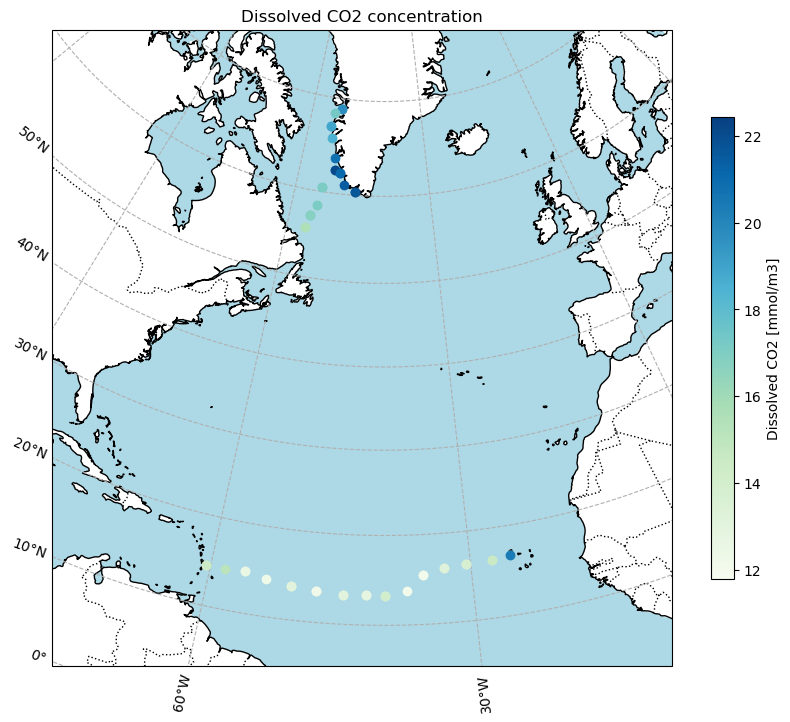

In [24]:
# Dissolved CO2 

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.LambertConformal(central_longitude=-40, central_latitude=50)}, figsize=(10, 10))

# Set map extent (focus on North Atlantic)
ax.set_extent([-75, -10, 5, 75], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor="white")
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.BORDERS, linestyle=":")

# Add grid lines
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Normalize the concentration values for color scaling
norm = mcolors.Normalize(vmin=data['co2_mmolm3'].min(), vmax=data['co2_mmolm3'].max())
colormap = cm.get_cmap('GnBu')

# Plot the GPS points with color depending on concentration
for _, row in data.iterrows():
    rgba = colormap(norm(row['co2_mmolm3']))  # Get the color based on concentration
    hex_color = mcolors.to_hex(rgba)  # Convert to hex color
    ax.plot(row['Longitude'], row['Latitude'], marker='o', markersize=6, color=hex_color, transform=ccrs.PlateCarree())

# Add colorbar legend
sm = cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])  # Needed only for matplotlib < 3.1
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.6, pad=0.05)
cbar.set_label('Dissolved CO2 [mmol/m3]')

# Add title
plt.title("Dissolved CO2 concentration")

# Show the plot
plt.show()

C:\Users\lolap\AppData\Local\Temp\ipykernel_10232\3981537864.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('RdPu')


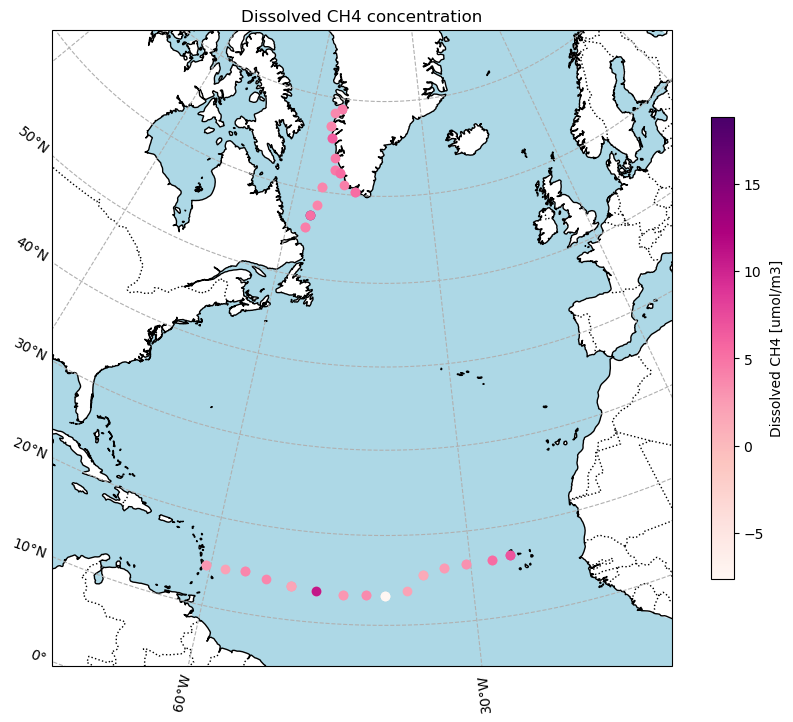

In [35]:
# Dissolved CO2 

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.LambertConformal(central_longitude=-40, central_latitude=50)}, figsize=(10, 10))

# Set map extent (focus on North Atlantic)
ax.set_extent([-75, -10, 5, 75], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor="white")
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.BORDERS, linestyle=":")

# Add grid lines
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Normalize the concentration values for color scaling
norm = mcolors.Normalize(vmin=data['ch4_umolm3'].min(), vmax=data['ch4_umolm3'].max())
colormap = cm.get_cmap('RdPu')

# Plot the GPS points with color depending on concentration
for _, row in data.iterrows():
    rgba = colormap(norm(row['ch4_umolm3']))  # Get the color based on concentration
    hex_color = mcolors.to_hex(rgba)  # Convert to hex color
    ax.plot(row['Longitude'], row['Latitude'], marker='o', markersize=6, color=hex_color, transform=ccrs.PlateCarree())

# Add colorbar legend
sm = cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])  # Needed only for matplotlib < 3.1
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.6, pad=0.05)
cbar.set_label('Dissolved CH4 [umol/m3]')

# Add title
plt.title("Dissolved CH4 concentration")

# Show the plot
plt.show()